# Stats701 Homework 9, Winter 2018
### David Guo
#### davidguo@umich.edu

Discussion: Problem 1 with Noah Gale. Problem 2 with Jeanhee Pak. Problem 3 with Alex Everett and Jeanhee Pak.

Time to do each homework problem:

- Problem 1 took about 3 hours

- Problem 2 took about 7 hours
    
- Problem 3 took about 20 hours

- Write-up took about 4 hours

### 1

#### 1.1

In [ ]:
#This is used in wordcount.py

from mrjob.job import MRJob
from mrjob.step import MRStep
import re

word_re = re.compile(r"([A-Za-z]+['-]{1}[A-Za-z]+|[A-Za-z]+)") 
#check hyphenated or apostrophe words, or normal words

class MRWordCount(MRJob):
    
    def mapper(self, _, line):
        for word in word_re.findall(line):
            yield (word.lower(), 1) # get a count of the key and index
            
    def combiner(self, word, counts):
        yield (word, sum(counts)) 
        
    def reducer(self, word, counts):
         yield (word, sum(counts))

if __name__ == '__main__':
    MRWordCount.run()

#### 1.2

For the simple text, I ran on my local machine:

$\texttt{python wordcount.py simple.txt > simple_word_counts.txt}$

I also added some other text in the file $\texttt{testtext.txt}$ to check some edge cases.

#### 1.3

I copied $\texttt{wordcount.py}$ to flux with

$\texttt{scp wordcount.py davidguo@flux-hadoop-login.arc-ts.umich.edu}$

I ran

$\texttt{python wordcount.py -r hadoop hdfs:///var/stat701w18/moby_dick.txt}$

It output to a folder (I could have output to a file, but did not in this case). I sent the file to the flux server:

$\texttt{hdfs dfs -get hdfs:///user/davidguo/tmp/mrjob/wordcount.davidguo.20180402.180318.06013}$

I then copied the file from flux to my local machine.

$\texttt{scp davidguo@flux-hadoop-login.arc-ts.umich.edu:part-0000 moby_dick.txt}$

#### 1.4

In [16]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
import pandas as pd
import numpy as np

In [76]:
moby = pd.read_csv("word_counts.txt", sep = "\t", header = None)
moby.columns = ["word","count"]
moby = moby.drop(0, 0) #drop the entry where '-' is treated as a word

In [77]:
moby = moby.sort_values("count",ascending = False)
moby = moby.reset_index()
rank = np.arange(1,len(moby)+1)

In [78]:
moby['rank'] = pd.Series(rank)

In [79]:
moby

,index,word,count,rank
0,16117,the,14707,1
1,10892,of,6716,2
2,536,and,6502,3
3,5,a,4790,4
4,16367,to,4679,5
5,8066,in,4234,6
6,16115,that,3100,7
7,8619,it,2533,8
8,7566,his,2532,9
9,7862,i,2127,10


In [80]:
moby['log_count'] = np.log(moby['count'])
moby['log_rank'] = np.log(moby['rank'])

In [81]:
moby

,index,word,count,rank,log_count,log_rank
0,16117,the,14707,1,9.596079,0.000000
1,10892,of,6716,2,8.812248,0.693147
2,536,and,6502,3,8.779865,1.098612
3,5,a,4790,4,8.474286,1.386294
4,16367,to,4679,5,8.450840,1.609438
5,8066,in,4234,6,8.350902,1.791759
6,16115,that,3100,7,8.039157,1.945910
7,8619,it,2533,8,7.837160,2.079442
8,7566,his,2532,9,7.836765,2.197225
9,7862,i,2127,10,7.662468,2.302585


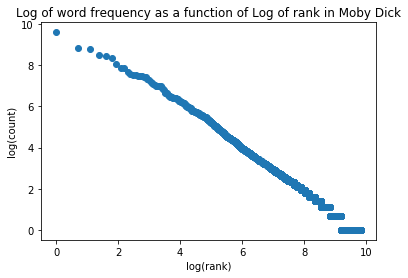

In [82]:
plt.plot(moby['log_rank'],moby['log_count'], 'o')
plt.xlabel('log(rank)')
plt.ylabel('log(count)')
plt.title('Log of word frequency as a function of Log of rank in Moby Dick')

This looks linear, we can say the distribution of word frequency in Moby Dick is Zipfian.

### 2

#### 2.1

We use the fact that the variance is $E[X^2]-E[X]^2$.

In [ ]:
# mr_summary_stat.py

from mrjob.job import MRJob
from mrjob.step import MRStep
import re
import math
import functools

class MRSummaryStats(MRJob):
        
    def steps(self):
         return [
             MRStep(mapper = self.mapper,
                    combiner = self.combiner,
                    reducer = self.reducer),
             MRStep(reducer = self.reducer_div)
         ]

    def mapper(self, _, line):
        # first entry is the label, second entry is the value
        yield int(line.split()[0]), float(line.split()[1])

    def combiner(self, label, val):
        for v in val:
            yield label, (1, v, v**2) # get the count, the value, and the value squared
    
    def reducer(self, label, val):
        yield label, functools.reduce(lambda x,y: (x[0]+y[0], x[1]+y[1], x[2]+y[2]), val)
        
        # get the sum

    def reducer_div(self, label, val):
        for v in val:
            yield label, (v[0], v[1]/v[0], v[2]/v[0]-(v[1]/v[0])**2)
            
        # divide the sum of values by the first entry, n, to get the mean.
        # For the variance, also divide the sum of squares by n to get E[X^2]

if __name__ == '__main__':
    MRSummaryStats.run()

In [26]:
#example test
#val = [(1,2,3), (3,4,5), (6,7,8)]
#list(map(lambda x: (x[0], x[1]/x[0], x[2]/x[0]-x[1]/x[0]), val))

#### 2.2

On the personal machine, I ran

$\texttt{python mr_summary_stats.py populations_small.txt > summary_small.txt}$

In [90]:
pd.read_csv('summary_small.txt', header = None, sep = '\t')

,0,1
0,0,"[3, 0.0, 2.6666666666666665]"
1,1,"[4, 10.0, 0.0]"
2,2,"[5, 5.0, 8.0]"


#### 2.3

On flux I ran:

$\texttt{python mr_summary_stats.py -r hadoop -c /etc/mrjob.conf hdfs:///var/stat701w18/populations_large.txt > summary_large.txt}$

Then copied to my local machine

$\texttt{scp davidguo@flux-hadoop-login.arc-ts.umich.edu:summary_large.txt summary_large.txt}$

Importing into pandas is just string, so I get elements from the summary column and convert to a list. I create pandas Series for sample size, means, and standard deviations, and construct a new pandas data frame.

In [91]:
l = pd.read_csv('summary_large.txt', sep = "\t", header = None)

In [92]:
l.columns=['class', 'summary']
l = l.sort_values('class').reset_index(drop=True)
l

,class,summary
0,0,"[834237, 11.562434283892557, 87499013.8387025]"
1,1,"[833777, 22.067051460814614, 92621488.47560832]"
2,2,"[832451, -14.857210333720584, 87338145.96809214]"
3,3,"[832676, -19.11766927764743, 81581436.87580727]"
4,4,"[833149, 15.099974508256016, 92922667.45568337]"
5,5,"[831961, -6.847776079634745, 105528024.59797779]"
6,6,"[833335, 3.556395959278101, 61423963.19379812]"
7,7,"[834354, 4.798076383114637, 85288463.9603821]"
8,8,"[833649, 15.778497492611915, 86666981.67259522]"
9,9,"[833158, 8.631111917292886, 72319972.96810105]"


In [93]:
y = []
for x in l['summary']:
    y.append(x.strip('[]').split())
for i in range(len(y)):
    y[i] = list(map(lambda x: float(x.strip(',')), y[i]))
    
n = []
mn = []
stddev = []

for i in range(len(y)):
    n.append(y[i][0])
    mn.append(y[i][1])
    stddev.append(y[i][2]**0.5)

In [87]:
l['n'] = pd.Series(n)

In [88]:
l['mn'] = pd.Series(mn)
l['stddev'] = pd.Series(stddev)

In [89]:
t_plot = l.drop(['summary', 'n'], axis=1)
t_plot

,class,mn,stddev
0,0,11.562434,9354.090754
1,1,22.067051,9624.005843
2,2,-14.857210,9345.488001
3,3,-19.117669,9032.244288
4,4,15.099975,9639.640421
5,5,-6.847776,10272.683418
6,6,3.556396,7837.344142
7,7,4.798076,9235.175362
8,8,15.778497,9309.510281
9,9,8.631112,8504.115061


(https://stackoverflow.com/questions/22364565/python-pylab-scatter-plot-error-bars-the-error-on-each-point-is-unique)

I use errorbar as opposed to boxplot.

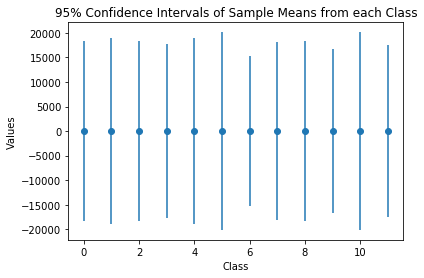

In [94]:
c = t_plot['class']
mn = t_plot['mn']
conf = 1.96*t_plot['stddev']
plt.errorbar(c, mn, conf, fmt = 'o')
plt.xlabel('Class')
plt.ylabel('Values')
plt.title('95% Confidence Intervals of Sample Means from each Class')
plt.figure(figsize=(5,5))

### 3

(Additional help from documenation: http://spark.apache.org/docs/2.1.0/api/python/pyspark.html)

Initially, I treated the fundamental unit as an edge, and looking mainly at 2-tuples, which ended up working, but was not computationally efficient.

Then I approached focusing only on vertices and creating 3-tuples to work with, rather than comparing groups of 3 2-tuples.

Because the files are in unicode, I read in and encoded the files as ASCII. I created a function to convert to integer, since I had difficulty with using a map statement to convert to integer.

I define the key as the 1st element, and the remaining elements as the values. I retain the key, and then map the values to the length-2 combinations of the values. The value is now a list of pairs.

To generate triples, I use flatMapValues have a 2-tuple, where the first element is the key, and the second element is the pair. Now I have every triple combination, but not in the same "nesting" of tuple, so I map these values accordingly.

I sort these tuples. There will be repeats, and if a triple only shows up once, there is not a triangle (it only covers 2 of the 3 edges). Then, we map these tuples to keys, and indicate its count with 1. I use reduceByKey to add the counts, and filter out the triples with count 1.

Since we don't need the counts, we extract just the keys. This is output to the textfile.

Code used on terminal:

$\texttt{scp fof.py davidguo@flux-hadoop-login.arc-ts.umich.edu:fof.py}$

$\texttt{ spark-submit --master yarn --queue teaching fof.py hdfs:///var/stat701w18/fof/friends.simple/ hdfs:///user/davidguo/no3}$

$\texttt{hdfs dfs -get hdfs:///user/davidguo/no3}$

$\texttt{ scp -r davidguo@flux-hadoop-login.arc-ts.umich.edu:/home/davidguo/no3/ small_triangle_list_parts/}$


$\texttt{spark-submit --master yarn --queue teaching --num-executors 35 --executor-memory 5g --executor-cores 4 fof.py hdfs:///var/stat701w18/fof/friends1000 hdfs:///user/davidguo/no3large}$

$\texttt{hdfs dfs -get hdfs:///user/davidguo/no3large}$

$\texttt{scp -r davidguo@flux-hadoop-login.arc-ts.umich.edu:/home/davidguo/no3large/ large_triangle_list_parts/}$

In [ ]:
#####fof.py

from pyspark import SparkConf, SparkContext
import sys
import itertools
if len(sys.argv) != 3:
    print('Usage: ' + sys.argv[0] + ' <in><out>')
    sys.exit(1)
inputlocation = sys.argv[1]
outputlocation = sys.argv[2]

conf = SparkConf().setAppName('Triangle')
sc = SparkContext(conf = conf)

#functions
def conv_int(l):
    return [int(x) for x in l]

data = sc.textFile(inputlocation) # input: 'hdfs:///var/stat701w18/fof/friends.simple'
#change to unicode  #https://stackoverflow.com/questions/34479444/how-to-remove-unicode-when-reading-data
data = data.map(lambda l: l.encode('ascii')) 
data = data.map(lambda l: l.split())
data = data.map(conv_int) #convert string to int

data = data.map(lambda v: (v[0], v[1:])) # first user as key, rest as values
data = data.map(lambda v: (v[0], list(itertools.combinations(v[1],2))))

#flatmapvalues http://spark.apache.org/docs/2.1.0/api/python/pyspark.html
#generate all pairs from key and the list of values

data = data.flatMapValues(lambda x: x).map(lambda x: (x[0], x[1][0], x[1][1])).map(lambda x: tuple(sorted(x))).map(lambda x: (x,1)).reduceByKey(lambda x,y: x+y).filter(lambda x: x[1] > 1).keys()
data.saveAsTextFile(outputlocation)
sc.stop()

#https://stackoverflow.com/questions/11304895/how-to-scp-a-folder-from-remote-to-local

The output from spark is in parts, so I this function reads in all the files in the folder, and outputs it as one text file.

In [95]:
import os
import re

def list_out(subfold,fileout):

    names = os.listdir(subfold)[1:]

    small_out = []

    for p in names:
        with open(subfold + '/' + p) as f:
            for line in f:
                small_out.append(line.split())

    small_out = sorted(small_out)
    
    with open(fileout,"w") as o:
        for t in small_out:
            o.write(t[0]+t[1]+t[2]+"\n")

In [12]:
list_out('small_triangle_list_parts', "small_triangle_list.txt")

In [13]:
list_out('big_triangle_list_parts', "big_triangle_list.txt")

In [97]:
pd.read_csv('small_triangle_list.txt', header = None)

,0,1,2
0,(100,200,217)
1,(100,200,300)
2,(100,200,400)
3,(100,300,400)
4,(200,300,400)
5,(300,400,500)


There are 6 triangles in the simple friend list.

In [96]:
pd.read_csv('big_triangle_list.txt', header = None)

,0,1,2
0,(0,11,127)
1,(0,11,42)
2,(0,11,590)
3,(0,11,602)
4,(0,11,681)
5,(0,11,82)
6,(0,11,839)
7,(0,11,938)
8,(0,121,161)
9,(0,121,369)


In [15]:
len(pd.read_csv('big_triangle_list.txt', header = None))

144120

There are 144120 unique triangles.

### Appendix

In [31]:
a = '100 200 217 300 400'.split()
b = '200 117 217 100 300 400'.split()
c = '300 200 100 400 317 500'.split()
d = '400 300 200 417 500 100'.split()
e = '500 300 418 400 111'.split()

(a[0], a[1:])

('100', ['200', '217', '300', '400'])

In [19]:
j = []
with open('big_triangle_list.txt',"r") as o:
    for line in o:
        j.append(o.readline().strip())

In [23]:
len(j)

72060

In [ ]:
full = [a] + [b] + [c] + [d] + [e]
full

In [ ]:
import itertools

In [ ]:
def pairs(y):
    k = y[0]
    return map(lambda i: sorted([k, y[i]]), range(1,len(y)))

In [ ]:
#flatten
#distinct

In [ ]:
pairs(b)

In [ ]:
#spark-submit --master yarn --queue teaching --num-executors 35 --executor-memory 5g --executor-cores 4 fof.py hdfs:///var/stat701w18/fof/friends1000 hdfs:///user/davidguo/no3large

In [182]:
j = [200, [3, 4, 5]]

In [199]:
def flat(l):
    new = [l[0]]
    for x in l[1]:
        new.append(x)
    return new

[200, 3, 4, 5]

In [127]:
def conv_int(l):
    return [int(x) for x in l]

In [172]:
from itertools import chain
def flat(l):
    return itertools.chain.from_iterable(l)

In [201]:
list(itertools.combinations(list(flat(j)),3))

[(200, 3, 4), (200, 3, 5), (200, 4, 5), (3, 4, 5)]

In [208]:
list(map(lambda x: itertools.chain.from_iterable(x),[[(3,4,5), (5,7,8)], [(3,4,5)]]))

[[3, 4, 5, 5, 7, 8], [3, 4, 5]]

In [220]:
h = [[(3,4,5), (5,7,8)], [(3,4,5)]]
print(h)

In [222]:
[k for k in h]

[[(3, 4, 5), (5, 7, 8)], [(3, 4, 5)]]

In [1]:
t = [(100, 217), (200, 217), (3,3), (5,6)]

In [4]:
import itertools
    itertools.combinations()

(200, 217)
(100, 217)


[((100, 217), (200, 217))]

In [ ]:
###EDGE APPROACH###

from pyspark import SparkConf, SparkContext
import sys

if len(sys.argv) != 3:
    print('Usage: ' + sys.argv[0] + ' <in><out>')
    sys.exit(1)
inputlocation = sys.argv[1]
outputlocation = sys.argv[2]


conf = SparkConf().setAppName('Triangle')
sc = SparkContext(conf = conf)

#functions
def conv_int(l):
    return [int(x) for x in l]

# order as a tuple, could use lambda x: tuple(sorted(x))
def rev(y):
    if y[0] > y[1]:
        return y[1], y[0]
    else:
        return y

#    
data = sc.textFile(inputlocation) # input: 'hdfs:///var/stat701w18/fof/friends.simple'
#change to unicode  #https://stackoverflow.com/questions/34479444/how-to-remove-unicode-when-reading-data
data = data.map(lambda l: l.encode('ascii')) 
data = data.map(lambda l: l.split())
data = data.map(conv_int) #convert string to int

data = data.map(lambda v: (v[0], v[1:])) # first user as key, rest as values

#flatmapvalues http://spark.apache.org/docs/2.1.0/api/python/pyspark.html
#generate all pairs from key and the list of values
data = data.flatMapValues(lambda x: x)

data = data.map(rev)

#dictionary of counts
d = data.flatMap(lambda x: x).map(lambda x: (x,1)).countByKey()
#if node shows up only once, throw out that pair/edge
nodes_keep = map(lambda x: x[0], filter(lambda x: x[1] > 1, data.flatMap(lambda x: x).map(lambda x: (x,1)).countByKey().items()))

#unique pairs
data = data.filter(lambda x: x[0] in map(lambda x: x[0], filter(lambda x: x[1] > 1, data.flatMap(lambda x: x).map(lambda x: (x,1)).countByKey().items())) and x[1] in map(lambda x: x[0], filter(lambda x: x[1] > 1, data.flatMap(lambda x: x).map(lambda x: (x,1)).countByKey().items()))).distinct() #p_uniq

#data = data.map(lambda x: (x[0], sorted(x[1]))).distinct()

d = data.flatMap(lambda x: x).map(lambda x: (x,1)).countByKey()
nodes_keep = map(lambda x: x[0], filter(lambda x: x[1] > 1, d.items()))
data = data.filter(lambda x: x[0] in nodes_keep and x[1] in nodes_keep) #p

#poss_tri = list(itertools.combinations(p_uniq.collect(), 3))
#p_uniq.cogroup(p_uniq).map(lambda x: (x[0], list(x[1][0]))).filter(lambda x: len(x[1])>1)
#p_rel.map(lambda x: (x,1)).foldByKey(0,add).map(lambda x: (x[1], x[0])).groupByKey().mapValues(list)

data = data.cartesian(data).distinct().filter(lambda x: x[0] != x[1]).cartesian(data)
data = data.distinct().map(lambda x: (x[0][0], x[0][1], x[1])).map(lambda x: tuple(sorted(x))).distinct() #trip_uniq

#trip = p_uniq.cartesian(p_uniq).distinct().filter(lambda x: x[0] != x[1]).cartesian(p_uniq).distinct().map(lambda x: (x[0][0], x[0][1], x[1]))
data = data.filter(lambda x: x[0]!=x[1] and x[0]!=x[2] and x[1]!=x[2]).filter(lambda t: len(set([t[0][0], t[0][1], t[1][0], t[1][1], t[2][0], t[2][1]])) == 3).map(lambda t: sorted(set([t[0][0], t[0][1], t[1][0], t[1][1], t[2][0], t[2][1]])))
data.saveAsTextFile(outputlocation)
sc.stop()